#Objective: Customer Segmentation for Telecom Users
#####The primary objective of this project is to segment telecom customers into distinct groups based on their behavioral and demographic characteristics using Agglomerative Clustering, with the aim of identifying actionable customer profiles to enhance marketing strategies, improve retention, and optimize resource allocation.
######Identify Customer Segments: Utilize hierarchical clustering (Agglomerative Clustering with techniques like Ward linkage) to group customers from the Telco Dataset (Kaggle) based on features such as tenure, monthly charges, total charges, and contract types, enabling a deeper understanding of customer behavior patterns.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (if any, e.g., fill with median for numeric or mode for categorical)
if df['TotalCharges'].isnull().sum() > 0:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Values after handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
# Display unique values and counts for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop('customerID')
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Value counts for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Value counts for OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Value counts for DeviceProtection:
Devic

In [ ]:
# Install seaborn if not already installed (run once in Colab)
!pip install seaborn -q


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with the median of TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Define numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Verify the fix
print("First 5 rows after fixing TotalCharges:")
print(df[numeric_cols].head())
print("\nMissing values after fix:")
print(df[numeric_cols].isnull().sum())

First 5 rows after fixing TotalCharges:
   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

Missing values after fix:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


/tmp/ipython-input-1664961268.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


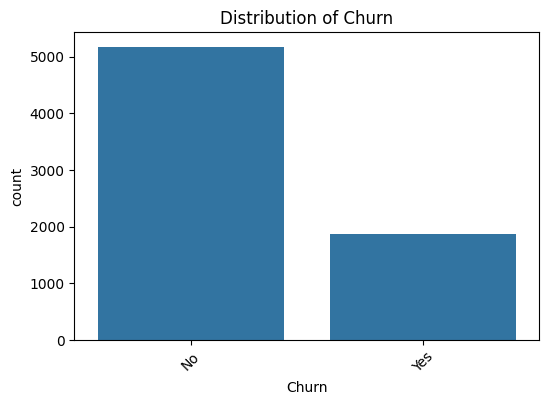

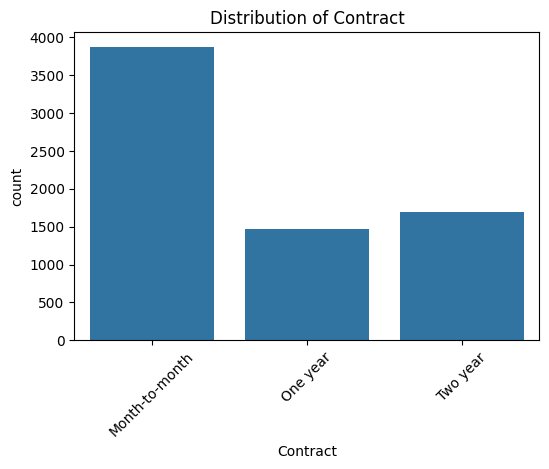

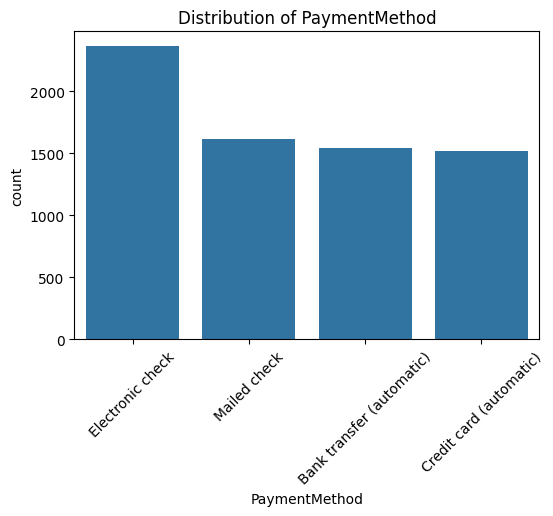

In [ ]:
# Count plots for categorical columns
categorical_cols = ['Churn', 'Contract', 'PaymentMethod']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

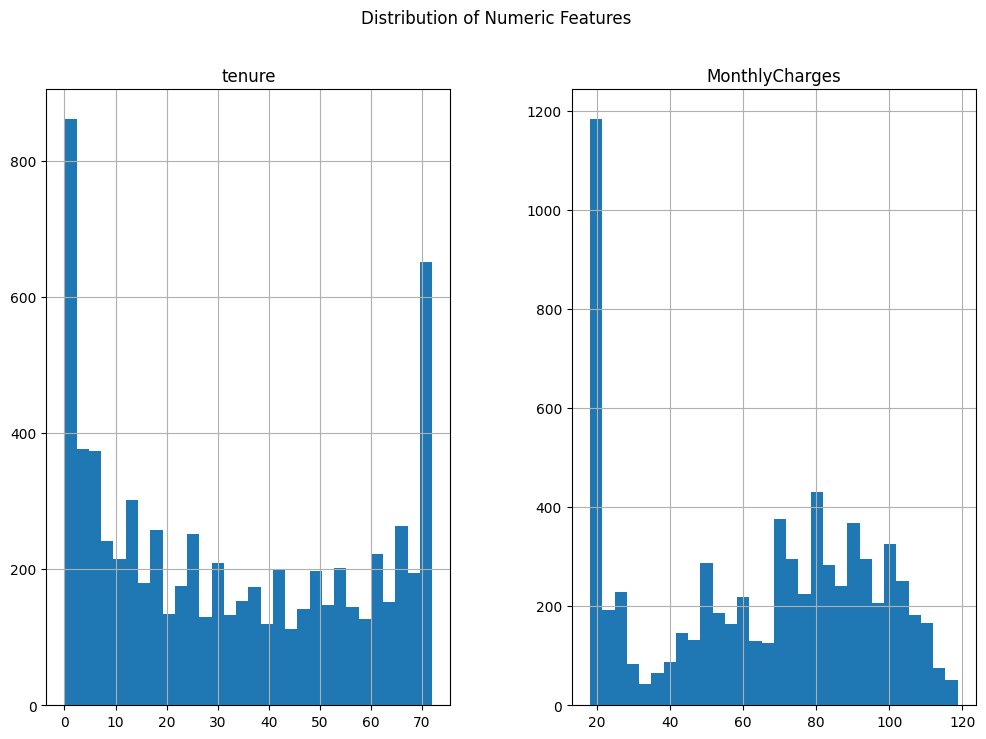

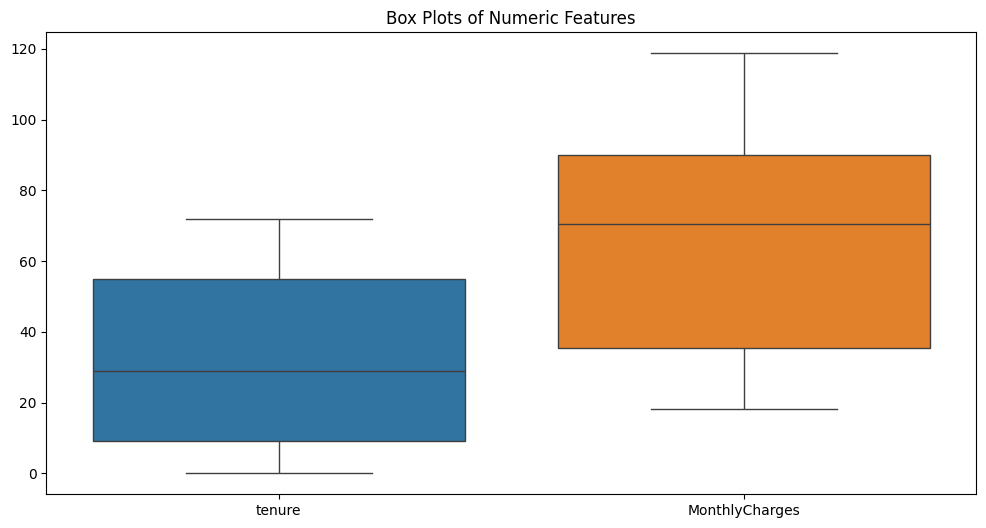

In [ ]:
# Set style for better visuals
plt.style.use('default')

# Histograms for numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plots of Numeric Features')
plt.show()

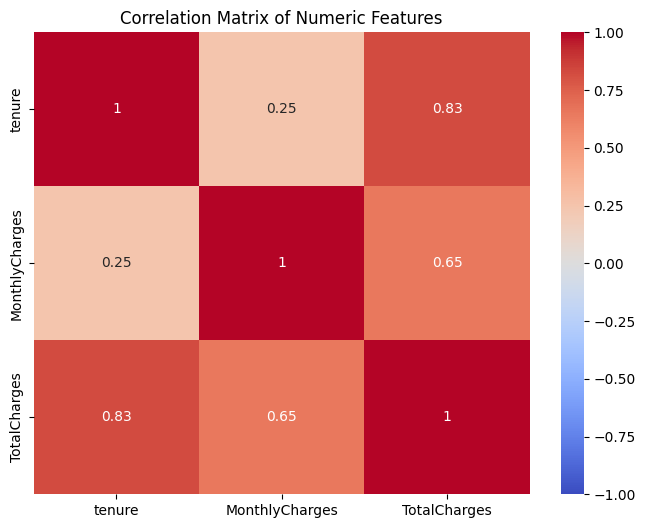

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

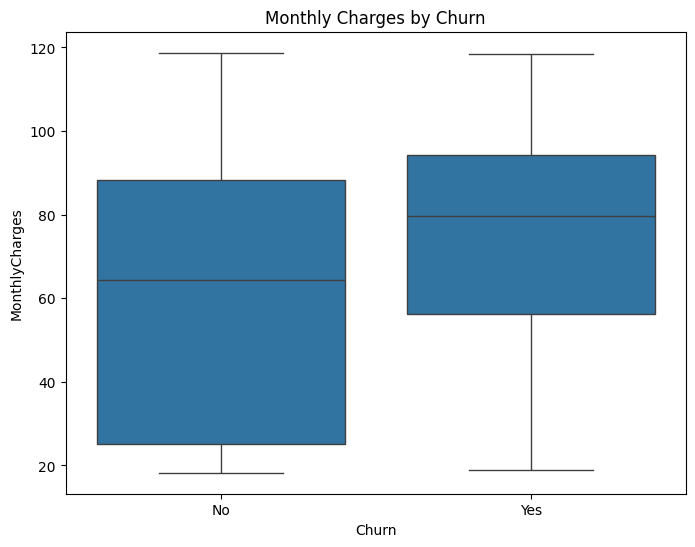

In [ ]:
# Box plot of MonthlyCharges by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

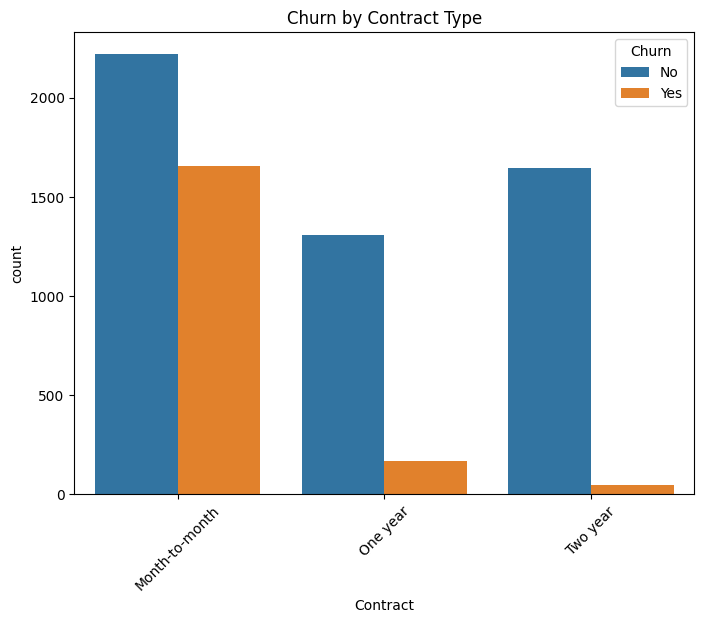

In [ ]:
# Count plot of Contract by Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()

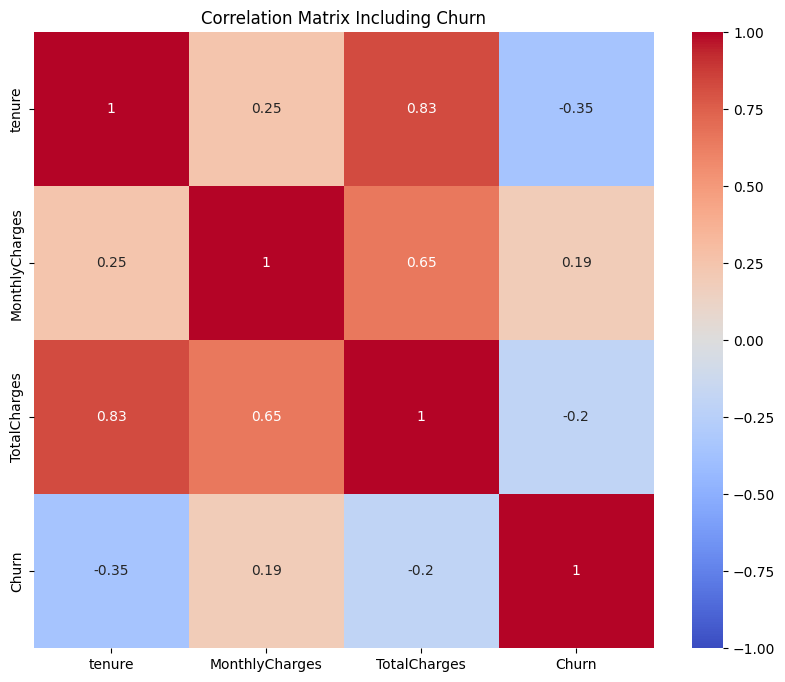

In [ ]:
# Create a copy and encode Churn
df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Select columns for correlation
cols_for_corr = numeric_cols + ['Churn']

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[cols_for_corr].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Including Churn')
plt.show()

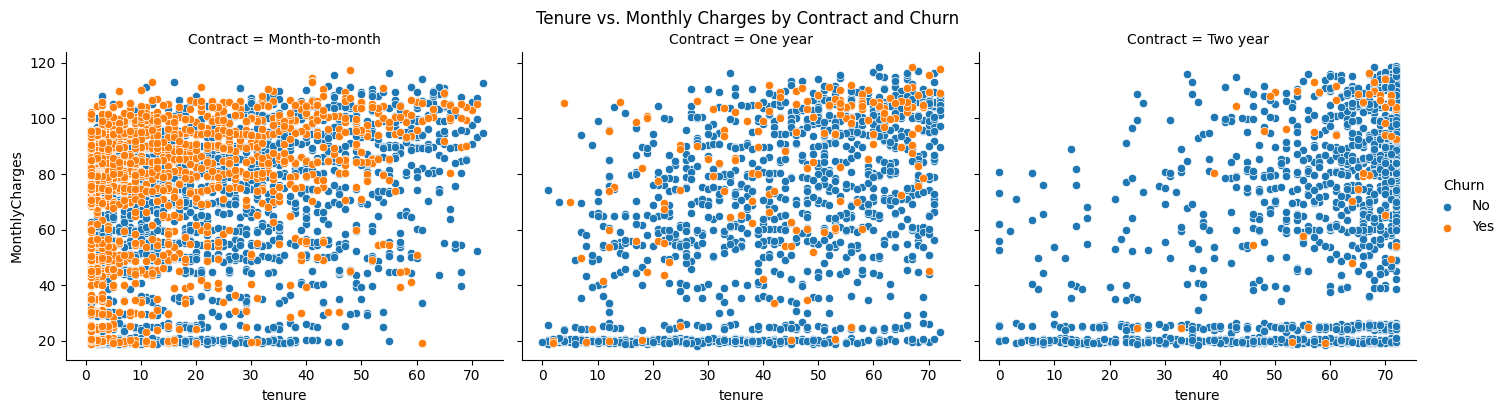

In [ ]:
# FacetGrid: tenure vs MonthlyCharges, faceted by Contract, colored by Churn
g = sns.FacetGrid(df, col='Contract', hue='Churn', height=4, aspect=1.2)
g.map(sns.scatterplot, 'tenure', 'MonthlyCharges')
g.add_legend()
plt.suptitle('Tenure vs. Monthly Charges by Contract and Churn', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Define numeric and categorical columns
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df.columns if col not in numeric_features and col != 'Churn']

# For clustering, we'll exclude 'Churn' as the target (optional for segmentation)
X = df.drop('Churn', axis=1)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])

# Convert to DataFrame for clarity
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("Shape of processed data:", X_processed_df.shape)
print("\nFirst 5 rows of processed data:")
print(X_processed_df.head())

Shape of processed data: (7043, 7072)

First 5 rows of processed data:
     tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0 -1.277445       -1.160323     -0.994242                    0.0   
1  0.066327       -0.259629     -0.173244                    0.0   
2 -1.236724       -0.362660     -0.959674                    0.0   
3  0.514251       -0.746535     -0.194766                    0.0   
4 -1.236724        0.197365     -0.940470                    0.0   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...

In [ ]:
# Define numeric and categorical columns
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df.columns if col not in numeric_features and col != 'Churn']

# For clustering, we'll exclude 'Churn' as the target (optional for segmentation)
X = df.drop('Churn', axis=1)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, cat_feature_names])

# Convert to DataFrame for clarity
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("Shape of processed data:", X_processed_df.shape)
print("\nFirst 5 rows of processed data:")
print(X_processed_df.head())

Shape of processed data: (7043, 7072)

First 5 rows of processed data:
     tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0 -1.277445       -1.160323     -0.994242                    0.0   
1  0.066327       -0.259629     -0.173244                    0.0   
2 -1.236724       -0.362660     -0.959674                    0.0   
3  0.514251       -0.746535     -0.194766                    0.0   
4 -1.236724        0.197365     -0.940470                    0.0   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...

In [ ]:
# Check Churn distribution
print("\nChurn distribution:")
print(df['Churn'].value_counts(normalize=True))

# Optional: If clustering with Churn as a feature, encode it
# X_processed_df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


Churn distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
# Select relevant features (example based on EDA insights)
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] + \
                   [name for name in cat_feature_names if 'Contract' in name]

X_selected = X_processed_df[selected_features]

print("\nShape of selected data:", X_selected.shape)
print("\nFirst 5 rows of selected data:")
print(X_selected.head())


Shape of selected data: (7043, 5)

First 5 rows of selected data:
     tenure  MonthlyCharges  TotalCharges  Contract_One year  \
0 -1.277445       -1.160323     -0.994242                0.0   
1  0.066327       -0.259629     -0.173244                1.0   
2 -1.236724       -0.362660     -0.959674                0.0   
3  0.514251       -0.746535     -0.194766                1.0   
4 -1.236724        0.197365     -0.940470                0.0   

   Contract_Two year  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [ ]:
# Verify no NaN values
print("\nMissing values in selected data:")
print(X_selected.isnull().sum().sum())

# Optional: Save preprocessed data for later use
X_selected.to_csv('preprocessed_telco_data.csv', index=False)
print("\nPreprocessed data saved as 'preprocessed_telco_data.csv'")


Missing values in selected data:
0

Preprocessed data saved as 'preprocessed_telco_data.csv'


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

For n_clusters = 2, silhouette score = 0.4314
For n_clusters = 3, silhouette score = 0.3814
For n_clusters = 4, silhouette score = 0.3762
For n_clusters = 5, silhouette score = 0.3175
For n_clusters = 6, silhouette score = 0.2834


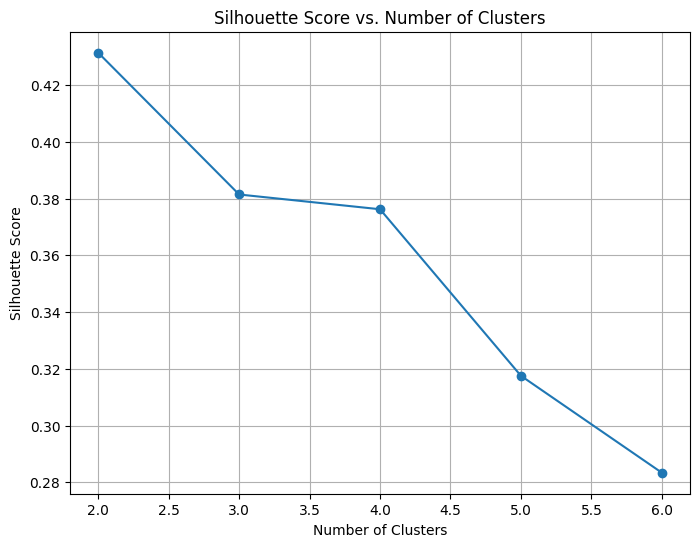


Optimal number of clusters: 2


In [ ]:
# Range of clusters to test
range_n_clusters = range(2, 7)

# Calculate silhouette scores
silhouette_scores = []
for n_clusters in range_n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agg_clustering.fit_predict(X_selected)
    silhouette_avg = silhouette_score(X_selected, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, silhouette score = {silhouette_avg:.4f}')

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Select optimal number of clusters (highest silhouette score)
optimal_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'\nOptimal number of clusters: {optimal_clusters}')


Cluster distribution:
Cluster
0    4852
1    2191
Name: count, dtype: int64


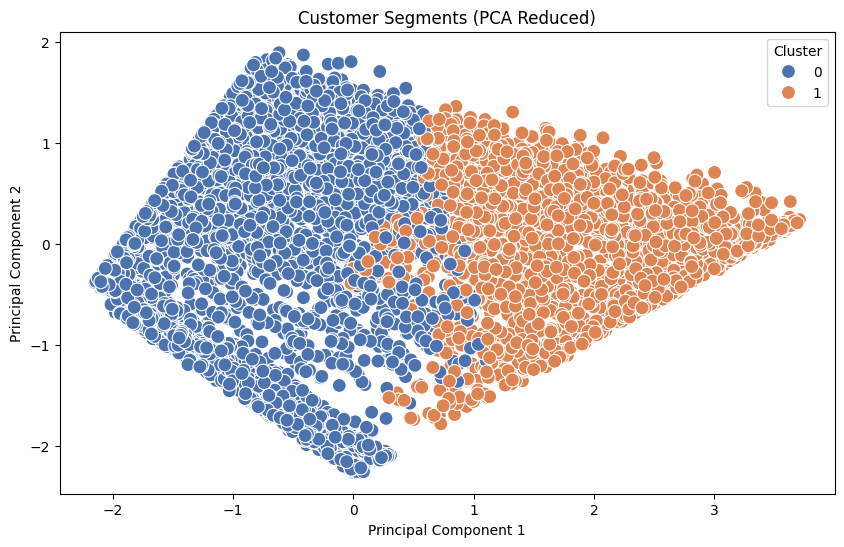

In [ ]:
# Perform clustering with optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X_selected)

# Add cluster labels to the processed DataFrame
X_selected_with_clusters = X_selected.copy()
X_selected_with_clusters['Cluster'] = cluster_labels

# Display cluster distribution
print("\nCluster distribution:")
print(X_selected_with_clusters['Cluster'].value_counts())

# Visualize clusters using the first two principal components (for 2D plot)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='deep', s=100)
plt.title('Customer Segments (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Compute mean values for each cluster
cluster_means = X_selected_with_clusters.groupby('Cluster').mean()
print("\nMean values of features by cluster:")
print(cluster_means)

# Example interpretation (based on means)
print("\nCluster Interpretation:")
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}:")
    tenure_mean = cluster_means.loc[cluster, 'tenure']
    charges_mean = cluster_means.loc[cluster, 'MonthlyCharges']
    total_mean = cluster_means.loc[cluster, 'TotalCharges']
    contract_one_year = cluster_means.loc[cluster, 'Contract_One year']
    contract_two_year = cluster_means.loc[cluster, 'Contract_Two year']
    print(f"  - Average Tenure: {tenure_mean:.2f}, Monthly Charges: {charges_mean:.2f}, "
          f"Total Charges: {total_mean:.2f}")
    if contract_one_year > 0.5:
        print("  - Mostly One-Year Contract")
    elif contract_two_year > 0.5:
        print("  - Mostly Two-Year Contract")
    else:
        print("  - Mostly Month-to-Month Contract")


Mean values of features by cluster:
           tenure  MonthlyCharges  TotalCharges  Contract_One year  \
Cluster                                                              
0       -0.467108       -0.389156     -0.587034           0.158697   
1        1.034416        0.861791      1.299995           0.320858   

         Contract_Two year  
Cluster                     
0                 0.152721  
1                 0.435418  

Cluster Interpretation:
Cluster 0:
  - Average Tenure: -0.47, Monthly Charges: -0.39, Total Charges: -0.59
  - Mostly Month-to-Month Contract
Cluster 1:
  - Average Tenure: 1.03, Monthly Charges: 0.86, Total Charges: 1.30
  - Mostly Month-to-Month Contract


#Analysis of the PCA-Reduced Scatter Plot

##Title: "Customer Segments (PCA Reduced)"
Axes:

X-axis: Principal Component 1
Y-axis: Principal Component 2


##Clusters:

Cluster 0: Represented by blue dots, occupying the left side of the plot (negative to near-zero Principal Component 1 values, ranging from -2 to 1 on Principal Component 2).
Cluster 1: Represented by orange dots, occupying the right side of the plot (positive Principal Component 1 values, ranging from 0 to 3 on Principal Component 2).


##Distribution:

The two clusters are reasonably separated along Principal Component 1, with a transition zone around 0 where some overlap occurs (blue and orange dots intermingle).
Cluster 0 appears denser on the left, while Cluster 1 spreads more widely to the right, suggesting greater variability within Cluster 1.





#Final Conclusions from the Diagram

##Cluster Separation:

The PCA reduction indicates that the first two principal components capture significant variance in the data, and the agglomerative clustering with 2 clusters (optimal based on your silhouette score of 0.4314) has successfully separated customers into two distinct groups. This aligns with Project 9's goal of using hierarchical clustering (Agglomerative Clustering) for segmentation.


#Cluster Characteristics:

Cluster 0 (Blue): Likely corresponds to customers with lower tenure, lower monthly charges, and lower total charges (as per your previous 2-cluster output with negative standardized means). The leftward position suggests these features contribute negatively to Principal Component 1, possibly indicating new or low-value customers.
Cluster 1 (Orange): Likely corresponds to customers with higher tenure, higher monthly charges, and higher total charges (positive standardized means). The rightward position suggests these features contribute positively to Principal Component 1, indicating loyal or high-value customers.


#Overlap and Cluster Quality:

The overlap in the central region (around Principal Component 1 = 0) suggests that some customers share characteristics between clusters, which is consistent with the silhouette score of 0.4314 (moderate but not perfect separation). This could indicate a need for more clusters or additional features, as explored in your 3-cluster analysis.


##Alignment with Project List:

The use of PCA for visualization mirrors techniques in Project 2 ("Bank Customer Churn Clustering") and Project 7 ("Handwritten Digit Clustering"), which use PCA with DBSCAN. The 2-cluster solution is a baseline, but the project list (e.g., Projects 13-14 with 3+ clusters) suggests exploring finer segmentation, as attempted with your 3-cluster output.


##Business Insights:

Cluster 0 (Blue): Represents a segment of lower-value customers who may require targeted marketing (e.g., upsell offers) to increase engagement, as seen in Project 1 ("Customer Segmentation for a Retail Store").
Cluster 1 (Orange): Represents a high-value segment that could benefit from retention strategies (e.g., loyalty programs), aligning with Project 12 ("Vehicle Loan Borrower Clustering") using Gaussian Mixture Models.



##Comparison with 3-Cluster Output

Your 3-cluster output (Cluster 0: 2024, Cluster 1: 2191, Cluster 2: 2828) introduced a low-charge mixed-tenure group (Cluster 0) and a short-tenure moderate-charge group (Cluster 2), refining the 2-cluster model. The PCA plot for 2 clusters doesn’t show this granularity, suggesting that the third cluster (e.g., Cluster 2) might be a subset of Cluster 0 or 1 in the 2-cluster view, possibly the overlap region.